In [1]:
import os
# Set environment variable to avoid memory leak issue before any sklearn import
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

df = pd.read_csv('Mall_Customer.csv')


df.head()


,CustomerID,Annual_Spend,Frequency_of_Purchase,Average_Purchase_Value
0,1,15000,50,300
1,2,22000,60,367
2,3,17000,55,309
3,4,18000,45,400
4,5,25000,80,312


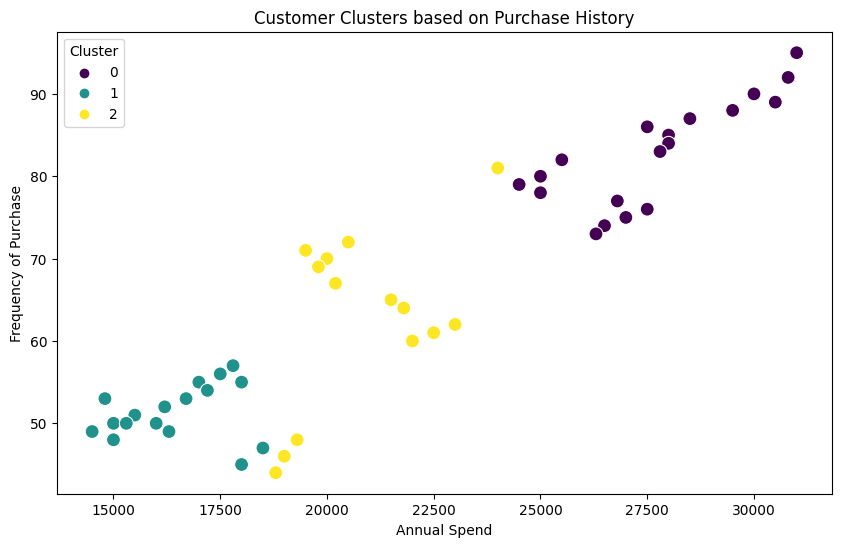

In [2]:

X = df[['Annual_Spend', 'Frequency_of_Purchase', 'Average_Purchase_Value']]

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Spend', y='Frequency_of_Purchase', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters based on Purchase History')
plt.xlabel('Annual Spend')
plt.ylabel('Frequency of Purchase')
plt.show()

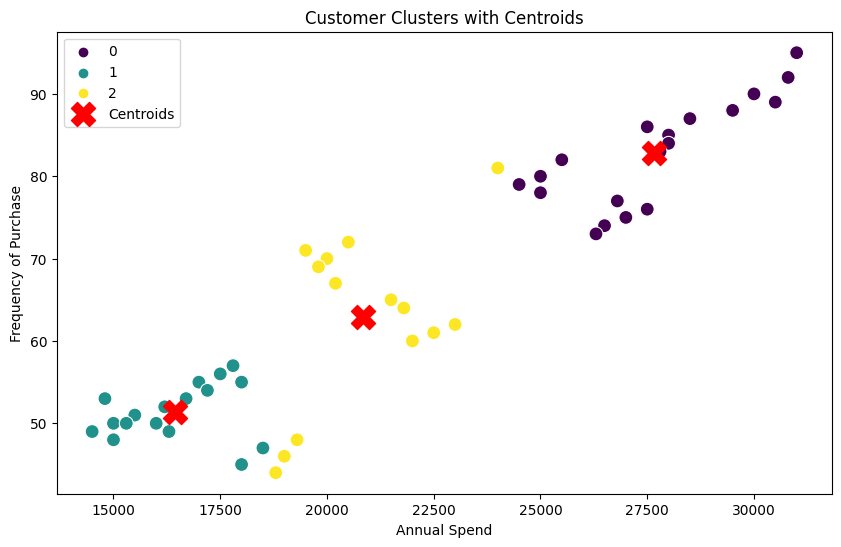

In [3]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Spend', y='Frequency_of_Purchase', hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Clusters with Centroids')
plt.xlabel('Annual Spend')
plt.ylabel('Frequency of Purchase')
plt.legend()
plt.show()


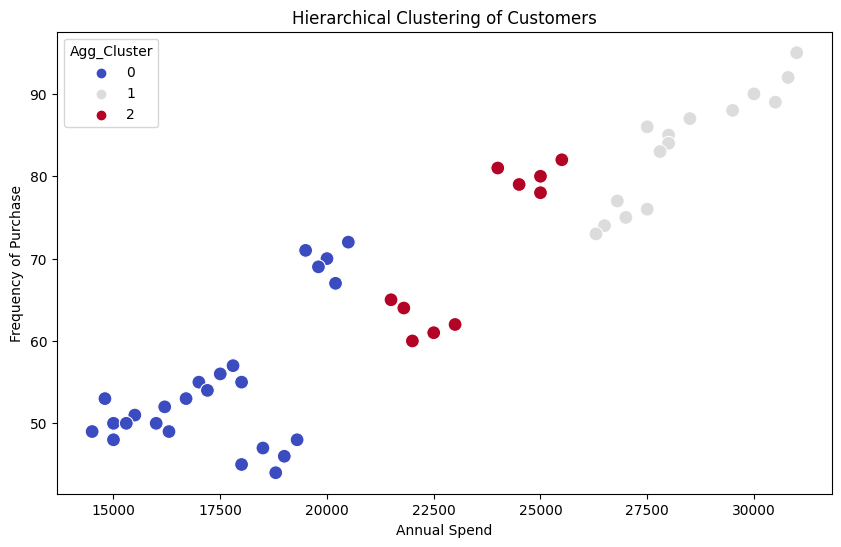

In [4]:

from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
df['Agg_Cluster'] = agg_clustering.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Spend', y='Frequency_of_Purchase', hue='Agg_Cluster', palette='coolwarm', s=100)
plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Annual Spend')
plt.ylabel('Frequency of Purchase')
plt.show()
